In [1]:
#imprting all the l;ibraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data
df = pd.read_csv("D:\DATA SC_Practice Project\p1\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

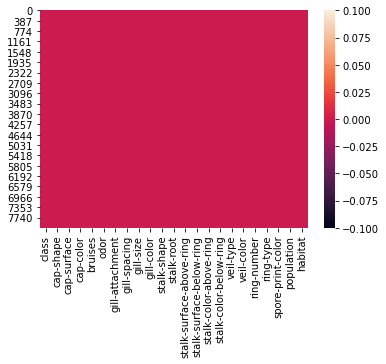

In [5]:
sns.heatmap(df.isna())

C:\Users\Dell indpiron 15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stalk-root', ylabel='count'>

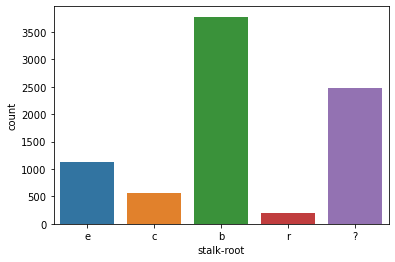

In [6]:
sns.countplot(df['stalk-root'])

In [7]:

df['stalk-root'].replace('?',np.nan,inplace=True)
df.isna().mean()

class                       0.000000
cap-shape                   0.000000
cap-surface                 0.000000
cap-color                   0.000000
bruises                     0.000000
odor                        0.000000
gill-attachment             0.000000
gill-spacing                0.000000
gill-size                   0.000000
gill-color                  0.000000
stalk-shape                 0.000000
stalk-root                  0.305268
stalk-surface-above-ring    0.000000
stalk-surface-below-ring    0.000000
stalk-color-above-ring      0.000000
stalk-color-below-ring      0.000000
veil-type                   0.000000
veil-color                  0.000000
ring-number                 0.000000
ring-type                   0.000000
spore-print-color           0.000000
population                  0.000000
habitat                     0.000000
dtype: float64

In [8]:
missing_data_per = 2480/len(df)*100
print('missing data from the stalk-root column is {0:0.2f}%'.format(missing_data_per))

missing data from the stalk-root column is 30.53%


In [9]:
# Thus it is pretty safe to drop out the stalk-root column
df_cleaned = df.drop('stalk-root',1)

In [10]:
df_cleaned

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [11]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [12]:
df_cleaned.drop('veil-type',1,inplace=True)

In [13]:
df_cleaned.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [14]:
# Checking for the class balance in the dataset

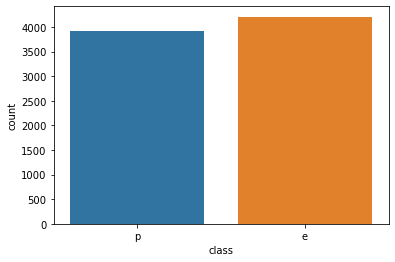

In [15]:
#Plot each class frequency
sns.countplot(x='class',data=df)
plt.show()

# There are 2 classes in the dependent variables and are well balanced

C:\Users\Dell indpiron 15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='habitat', ylabel='count'>

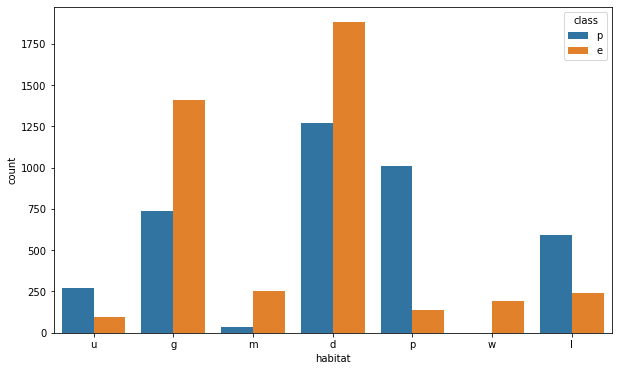

In [16]:
# Let's Check for most habitat
fig = plt.figure(figsize=(10,6))

fig.add_subplot(111)
#sns.countplot(df.habitat,hue=df.Class,palette='tab10')
sns.countplot(df.habitat,hue='class',data=df,palette='tab10')

# Encoding Categorical data

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_cleaned.columns:
    df_cleaned[i] = le.fit_transform(df_cleaned[i])

In [18]:
df_cleaned.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [19]:
# check the correation ofthe dataset
df_cleaned.corr()['class']

class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

<AxesSubplot:>

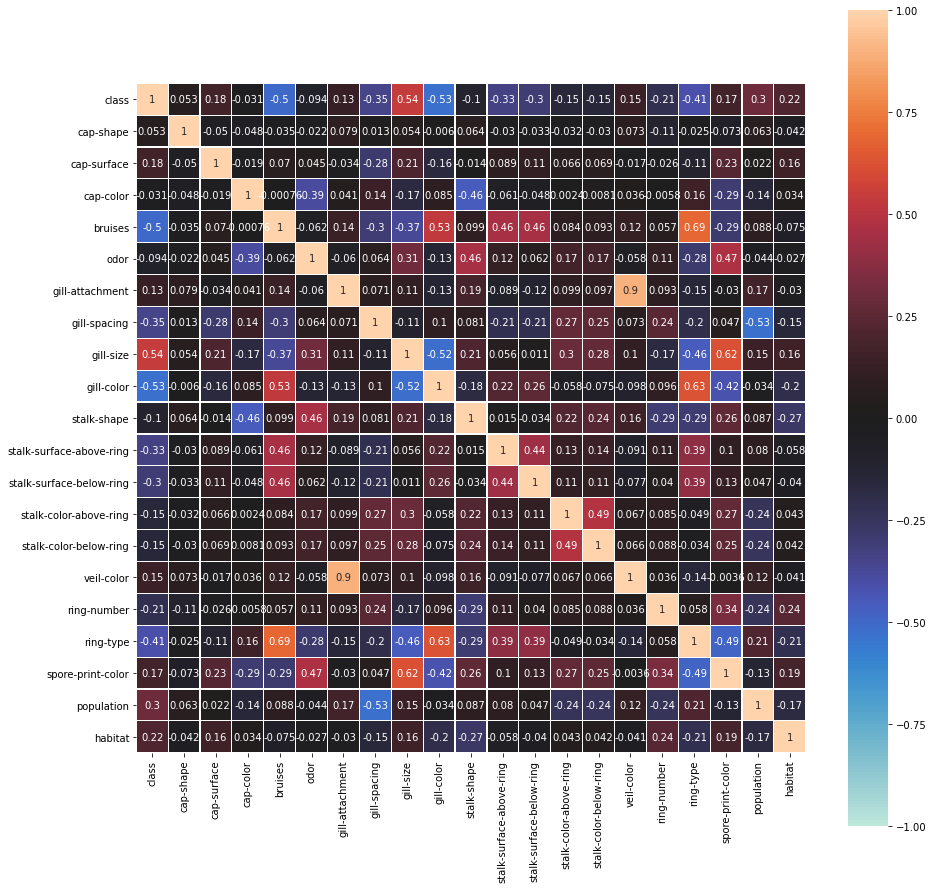

In [20]:
# the correaltion heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df_cleaned.corr(),vmin=-1, vmax=1, annot=True,square=True, center=0, fmt='.2g',linewidths=.15)

In [21]:
X = df_cleaned.drop('class',1)
y = df_cleaned['class']

In [22]:
X.shape,y.shape

((8124, 20), (8124,))

In [23]:
# Splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5443, 20), (2681, 20), (5443,), (2681,))

In [24]:
# Stating with logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train,y_train.ravel())
logistic_model.score(X_test,y_test)

0.9459157030958597

In [25]:
# first we need to Scale the data For SVC
# Scaling the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [26]:
from sklearn.svm import SVC
svc_model = SVC()

svc_model.fit(X_train,y_train.ravel())
svc_model.score(X_test,y_test)

y_preds = svc_model.predict(X_test)

In [27]:

from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [28]:
print(classification_report(y_test,svc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [29]:
print(confusion_matrix(y_test,svc_model.predict(X_test)))

[[1378    0]
 [   0 1303]]


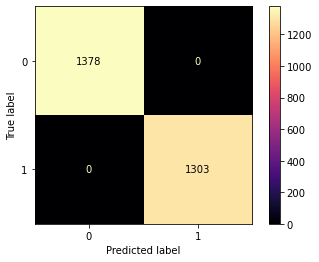

In [30]:
plot_confusion_matrix(svc_model,X_test,y_test,cmap='magma')

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc_model,X_test,y_test,cv=10)

array([1.        , 1.        , 1.        , 1.        , 0.99626866,
       1.        , 1.        , 1.        , 1.        , 0.99626866])

In [32]:

# PCA on the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
pca_components = pca.fit_transform(X)

In [33]:
pca.explained_variance_ratio_

array([0.34098234, 0.16880936, 0.1236169 , 0.0682309 , 0.05959469,
       0.0508935 , 0.04424121])

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [48]:
#Area under Curve(AUC)
auc = roc_auc_score(y_test,y_preds)
auc

1.0

In [43]:
fpr,tpr,thresholds = roc_curve(y_test,y_preds)

In [44]:
fpr

array([0., 0., 1.])

In [45]:
tpr

array([0., 1., 1.])

In [46]:
thresholds

array([2, 1, 0])

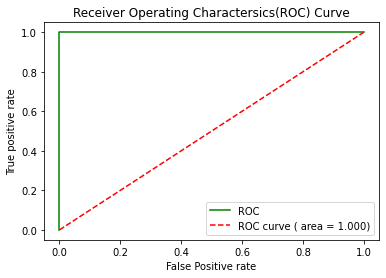

In [49]:
plt.plot(fpr, tpr, color="green", label="ROC")
plt.plot([0,1],[0,1], color='Red', linestyle='--', label='ROC curve ( area = %0.3f)'% auc)
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Charactersics(ROC) Curve')
plt.legend()
plt.show()